# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Прочтём файл, если необходимо разделим данные

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
estate = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t" )
estate.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видно много пропусков. Посмотрим на данныйе, используя **.describe()**

In [3]:
estate.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Данные выглядят нормально, но есть стометровые потолки и квартиры по 19 комнат. Последнее все же возможно.
Посмотрим пропуски

In [4]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Оценим процент пропусков в каждом из столбцов

In [5]:
def percent_of_nan(df):
    nan_sum = df.isnull().sum(axis = 0).sort_values(ascending = False)
    nan_percent = (nan_sum / len(df))*100
    new_frame = {'Число пропусков': nan_sum, 'Процент пропусков': nan_percent}
    dataframe = pd.DataFrame(new_frame).sort_values(by = 'Процент пропусков', ascending = False).round(2)
    return dataframe

percent_of_nan(estate)

,Число пропусков,Процент пропусков
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28
ponds_around3000,5518,23.28
days_exposition,3181,13.42


Есть 5 столбцов, где процент пропусков большой ( от 38.8 до 88.3 )

**is_apartment** - относительно новое явление на рынке недвижимости, думаю что при подаче объявления о продаже часто пропускается этот параметр. Те люди, которые знают, что апарты - это формально нежилой фонд, ставят отметку. Тем более, если они владельцы. Хозяева обычных квартир вряд ли знают разницу между последними и апартами. Поэтому этот параметр не заполняется.
Возможно 88 процентов это просто не аппартаменты, т.е. = 0. Надо смотреть на данные

**parks_nearest** - не самый ключевой параметр. В большинстве случаев просто не заполняется. Но какие-то данные есть, можно сделать срез и посмотреть зависимости или не трогать совсем

**pond_nearest** - аналогично **parks_nearest**

**balcony** - предположим, там где 0 (балконов нет) стоит NaN.

**ceiling_height** - параметр, который не все категории граждан могут измерить. Можно попробовать заменить в среднем по городу или даже по удаленности от центра. Это общеизвестный факт, что в центре Питера потолки в среднем выше, чем по городу

Остальные столбцы с NaN:

**airoports_nearest**, **cityСenters_nearest** - пока непонятно почему данные пропущены. Возможно из-за алгоритмов подсчета. Попробуем определить населенные пункты, где отсутствуют данные и заменить их или не трогать

**parks_around3000**, **pounds_around3000** - аналогично **parks_nearest** и **pond_nearest**. Есть большое желание оставить эти пункты как есть

**day_exposition** - неизестна дата закрытия объявления, отсюда и пропуски

**kitchen_area**, **living_area** - данные не заполнятюся. Есть вопрос по студиям - там жилой и кухонный объем находятся в одном помещение.

**floors_total** - можно проставить в зависимости от местоположения 

**locality_name** - странно что не прописано местонахождение квартиры, видимо по умолчанию считают, что это СПб


### Вывод

Данные "грязные". Есть что подчистить

### Шаг 2. Предобработка данных

Начинаем заполнять пропуски.
  Столбец **is_apartament**

In [6]:
print('NaN в столбце is_apartment:', estate['is_apartment'].isnull().sum())
estate['is_apartment'].value_counts()

NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Если заполнить NaN как False, то получится что во всем датафрейма всего 50 аппартаментов. Мне кажется их доля на рынке явно выше. Оставляем

Посмотрим на **airoports_nearest**, **cityCenters_nearest**

In [7]:
print('NaN по airports_nearest:', estate['airports_nearest'].isnull().sum())
print('NaN по cityCenters_nearest:', estate['cityCenters_nearest'].isnull().sum())

NaN по airports_nearest: 5542
NaN по cityCenters_nearest: 5519


Примем решения их не трогать, если есть пропуск, то и аэропорта поблизости, скорее всего нет

**parks_around3000**, **pounds_around3000**, **parks_nearest и pond_nearest** - принимаем решение их не трогать, аналогично расстояния до центра и аэропорта

**balcony** - NaN заменим на 0 - балкона нет 

In [8]:
print('NaN по balcony:', estate['balcony'].isnull().sum())

NaN по balcony: 11519


In [9]:
estate['balcony'] = estate['balcony'].fillna(0)
print('NaN в столбце balcony:', estate['balcony'].isnull().sum())

NaN в столбце balcony: 0


рассмотрим **cieling_height**

In [10]:
estate['ceiling_height'].isnull().sum()

9195

Категоризируем следующим образом:  
центр: 0 - 2км  
центральная часть (напримем, Петроградский район): 2 - 5км  
до КАД: 5-20км  
после КАД: 20 и болле км  (область)

In [11]:
def fill_ceiling_height(row):
    if row['cityCenters_nearest'] <= 2000:
        return 'центр'
    elif row['cityCenters_nearest'] > 2000 and row['cityCenters_nearest'] <= 5000:
        return 'центральная часть'
    elif row['cityCenters_nearest'] > 5000 and row['cityCenters_nearest'] <= 20000:
        return 'до КАД'
    
    return 'область'
    
estate['fromcenter_cat'] = estate.apply(fill_ceiling_height, axis=1) #добавим столбец с категорией в таблицу
#estate['fromcenter_cat'].value_counts()
#estate.head(10) #посмотрим
estate['fromcenter_cat'].value_counts()

до КАД               13467
область               8151
центральная часть     1753
центр                  328
Name: fromcenter_cat, dtype: int64

Заполним пропуски в столбце **ceiling_height** средним по каждой группе **fromcenter_category**

In [12]:
estate.groupby('fromcenter_cat')['ceiling_height'].mean().sort_values(ascending=False) #посмотрим на среднее по высоте потолков

fromcenter_cat
центр                3.231623
центральная часть    3.197034
до КАД               2.736697
область              2.705190
Name: ceiling_height, dtype: float64

In [13]:
estate['ceiling_height'] = estate['ceiling_height'].fillna(estate.groupby('fromcenter_cat')['ceiling_height'].transform('mean'))  
estate['ceiling_height'].isnull().sum()

0

Было 9195 пропусков, стало 2575. Идем дальше

посмотрим на **day_exposition**

In [14]:
print('NaN по days_exposition:', estate['days_exposition'].isnull().sum())

NaN по days_exposition: 3181


Вполне вероятно, что фактически жильё купили, а в интрнете объявление до сих пор висит. Мы можем получить очень большой срок продажи (годы). Предлагаю тут ничего не заполнять

Посмотрим на **kitchen_area и living_area**

In [15]:
print('NaN по kitchen_area:', estate['kitchen_area'].isnull().sum())
print('NaN по living_area:', estate['living_area'].isnull().sum())

NaN по kitchen_area: 2278
NaN по living_area: 1903


Проверим нашу теорию про студии

In [16]:
estate.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Менять NaN на среднее не совсем корректно, в центре может быть жилплощадь и 20 кв.метров (Например переформленная из коммнуальной квариты) и в пригороде поместье большой площади. Да и количество пропусков по студиям маловато от общей части

посмотрим на **floors_total**

In [17]:
print('NaN по floors_total:', estate['floors_total'].isnull().sum())

NaN по floors_total: 86


Заполним средним по группам удаленности от центра

In [18]:
estate['floors_total'] = estate['floors_total'].fillna(estate.groupby('fromcenter_cat')['floors_total'].transform('mean'))  
estate['floors_total'].isnull().sum()

0

Было 86 пропусков, стало 10

Посмотрим на **locality_name**

In [19]:
print('NaN по locality_name:', estate['locality_name'].isnull().sum())

NaN по locality_name: 49


Число пропусков мало, меняем на Санкт-Петербург

In [20]:
estate['locality_name'] = estate['locality_name'].fillna(estate['locality_name'] == 'Cанкт-Петербург')
print('NaN по locality_name:', estate['locality_name'].isnull().sum()) #проверим

NaN по locality_name: 0


Посмотрим на изменение в данных и приступим к изменению типа данных в столбцах

In [21]:

percent_of_nan(estate) #применим новую функцию

,Число пропусков,Процент пропусков
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
ponds_around3000,5518,23.28
parks_around3000,5518,23.28
days_exposition,3181,13.42
kitchen_area,2278,9.61
living_area,1903,8.03


In [22]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Меняем следующие столбцы:  
  
  **last_price** в int, при продаже квартир считать копейки, думаю, не стоит
  
  **total_area** - окрулгим до десятых. Целые значения площади - слишком грубо.
  
  **firts_day_exposition**  - в datetime
  
  
  **ceiling_height** - округлим до десятх. Целые значения высоты потолков - слишком грубое округление
  
  **floors_total** - этажи, только целое число - в int
  
  **balcony** - балконы, толбко целое число - в int
  
  **living_area** - аналогично total_area, до десятых
  
  **kitchen_area** - аналогично total_area, до десятых
  
  **days_exposition** - дни в int
  
  **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** - расстояние в метрах, переводим в int

In [23]:
int_list = ['last_price', 'airports_nearest', 'cityCenters_nearest', 
      'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column in int_list:
    estate[column] = estate[estate[column].notnull()][column].astype('int')

In [24]:
int16_list = ['days_exposition']

for column in int16_list:
    estate[column] = estate[estate[column].notnull()][column].astype('int16')

In [25]:
int8_list = ['floors_total', 'balcony']

for column in int8_list:
    estate[column] = estate[estate[column].notnull()][column].astype('int8')

In [26]:
float1_list = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
  
for column in float1_list:
    estate[column] = estate[estate[column].notnull()][column].round(1)

In [27]:
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
estate.sample(15) #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_cat
7240,18,12700000,100.9,2018-10-09,3,2.7,17,58.3,13,NaN,...,2,Санкт-Петербург,26293.0,10466.0,1.0,390.0,0.0,NaN,105.0,до КАД
20704,5,3850000,45.0,2017-10-13,2,2.7,5,32.0,4,NaN,...,0,Санкт-Петербург,14888.0,13428.0,0.0,NaN,1.0,512.0,124.0,до КАД
18112,20,7500000,62.3,2018-11-01,2,2.7,13,36.4,7,NaN,...,0,Санкт-Петербург,35353.0,15359.0,0.0,NaN,1.0,418.0,123.0,до КАД
18375,18,2800000,37.5,2016-05-26,1,2.7,5,15.7,1,NaN,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,область
1270,20,3999000,40.0,2016-06-17,1,2.7,18,16.3,18,NaN,...,1,Санкт-Петербург,42222.0,21539.0,0.0,NaN,1.0,487.0,585.0,область
14596,16,3550000,34.4,2018-08-27,1,2.7,14,16.0,10,NaN,...,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,74.0,область
2326,1,8500000,125.0,2017-09-28,4,3.5,6,95.0,3,NaN,...,0,Санкт-Петербург,20851.0,658.0,0.0,NaN,2.0,251.0,12.0,центр
1055,1,11472552,88.4,2016-05-12,3,3.1,16,52.5,3,NaN,...,0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,54.0,до КАД
18358,10,2320000,31.0,2017-05-25,1,2.6,5,17.0,5,NaN,...,1,Санкт-Петербург,14363.0,15442.0,1.0,541.0,0.0,NaN,464.0,до КАД
23340,12,7575000,69.0,2017-01-13,3,2.7,14,41.2,3,False,...,0,Санкт-Петербург,35455.0,11356.0,0.0,NaN,2.0,662.0,214.0,до КАД


### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу цену квадратного метра

In [29]:
estate['square_meter_price'] = estate['last_price'] / estate ['total_area']
estate['square_meter_price'] = estate['square_meter_price'].astype(int) #округлим до целых, тк это цена за кв.метр. Копейки неуместны

Добавим соотношение жилой площади и кухни к общей площади

In [30]:
estate['living_area_part'] = estate['living_area'] / estate['total_area']
estate['kitchen_area_part'] = estate['kitchen_area'] / estate['total_area']
estate['living_area_part'] = estate['living_area_part'].round(2) #округлим до двух цифр после запятой
estate['kitchen_area_part'] = estate['kitchen_area_part'].round(2) #округлим до двух цифр после запятой

Добавим год, месяц и день

In [31]:
estate['weekday'] = estate['first_day_exposition'].apply(lambda x: x.isoweekday())
estate['month'] = estate['first_day_exposition'].apply(lambda x: x.month)
estate['year'] = estate['first_day_exposition'].apply(lambda x: x.year)

In [32]:
weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
estate['weekday'] = estate['weekday'].map(weekdays)
estate['weekday'].head().to_frame()

,weekday
0,четверг
1,вторник
2,четверг
3,пятница
4,вторник


Напишем функцию для категоризации этажей на первый, последний и другой

In [33]:
def floors_def(row):
    if row['floors_total'] == row ['floor']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'

    return 'Другой'

estate['floor_cat'] = estate.apply(floors_def, axis = 1)

In [34]:
estate.sample(10) #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,fromcenter_cat,square_meter_price,living_area_part,kitchen_area_part,weekday,month,year,floor_cat
4935,18,18350000,90.0,2016-11-24,3,2.8,16,50.0,11,NaN,...,1157.0,NaN,до КАД,203888,0.56,0.20,четверг,11,2016,Другой
16415,15,5350000,60.0,2015-08-25,2,2.8,20,45.0,4,NaN,...,233.0,808.0,до КАД,89166,0.75,NaN,вторник,8,2015,Другой
22540,13,3530000,42.0,2018-09-07,2,2.5,4,28.0,3,NaN,...,NaN,20.0,до КАД,84047,0.67,0.12,пятница,9,2018,Другой
18223,9,1888000,70.0,2018-07-11,3,3.0,2,45.0,2,NaN,...,NaN,120.0,область,26971,0.64,0.17,среда,7,2018,Последний
9905,0,3400000,32.0,2017-02-09,1,2.5,9,16.5,9,False,...,724.0,704.0,до КАД,106250,0.52,0.27,четверг,2,2017,Последний
6782,12,8500000,73.3,2017-04-20,2,3.0,5,37.5,4,NaN,...,564.0,218.0,до КАД,115961,0.51,0.17,четверг,4,2017,Другой
5931,10,7380000,86.0,2017-12-18,4,3.2,7,53.0,6,NaN,...,446.0,284.0,центральная часть,85813,0.62,0.15,понедельник,12,2017,Другой
8770,8,5500000,54.0,2017-05-27,2,2.7,10,30.4,4,NaN,...,1123.0,48.0,область,101851,0.56,0.15,суббота,5,2017,Другой
9773,9,1100000,45.0,2019-01-07,2,2.7,5,30.0,1,NaN,...,NaN,103.0,область,24444,0.67,0.11,понедельник,1,2019,Первый
5465,9,4450000,47.0,2019-02-11,2,2.6,9,30.0,4,NaN,...,761.0,53.0,до КАД,94680,0.64,0.17,понедельник,2,2019,Другой


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Изучим следующие параметры: площадь, цена, число комнат, высота потолков**

In [35]:
estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348635,6.541549e+06,2.070636,2.760897
std,35.654086,1.088701e+07,1.078405,0.990023
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


**total_area** - среднее значение площади квартир адекватно, но есть и 900 квардратов, похоже на выброс

**last_price** - цены на любой кошелек

**rooms** - от 0 до 19!

**ceiling_height** - от 1 до 100 ! минимальные и максимальные значения нереалистичны

Определим выбросы по 4 параметрам

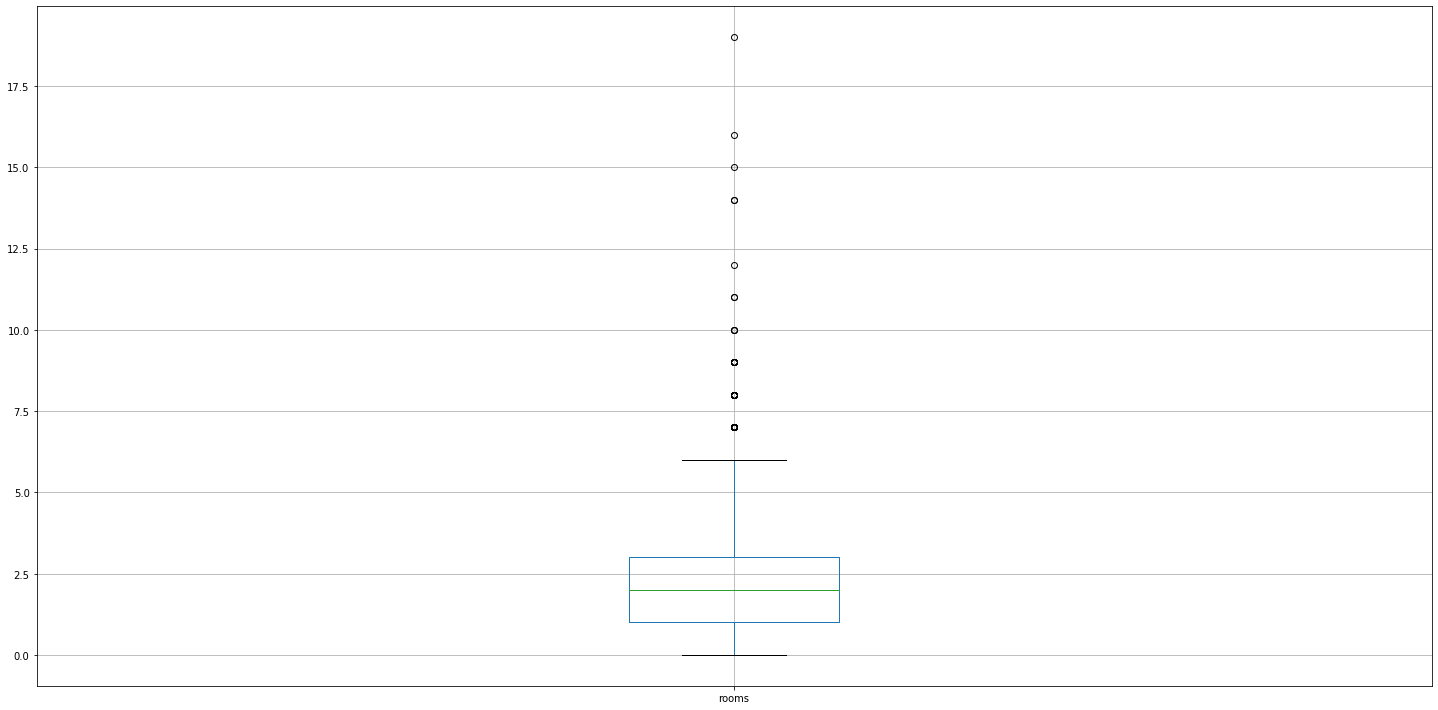

In [36]:
estate.boxplot('rooms', figsize = (25,12.5));

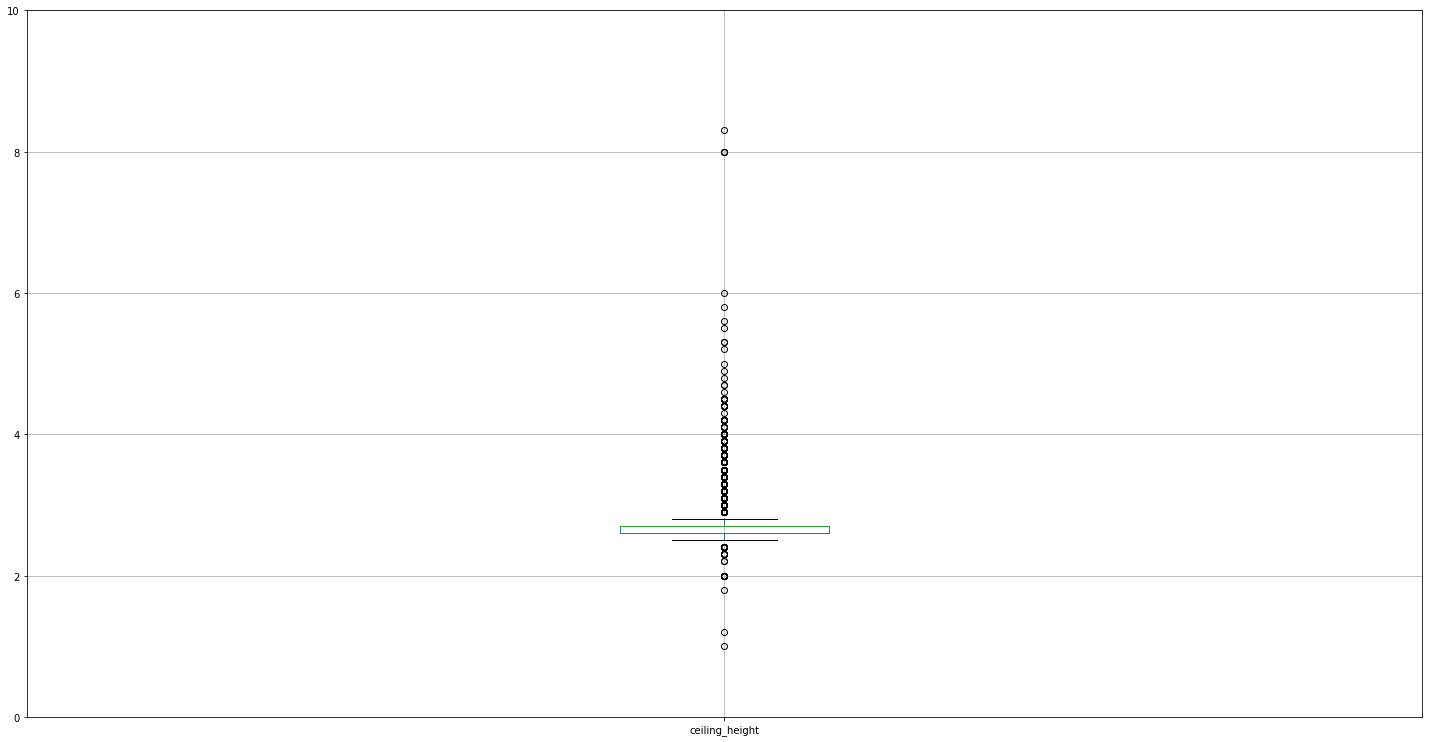

In [85]:
estate.boxplot('ceiling_height', figsize = (25,13))
plt.ylim(0, 10);

(0, 20000000)

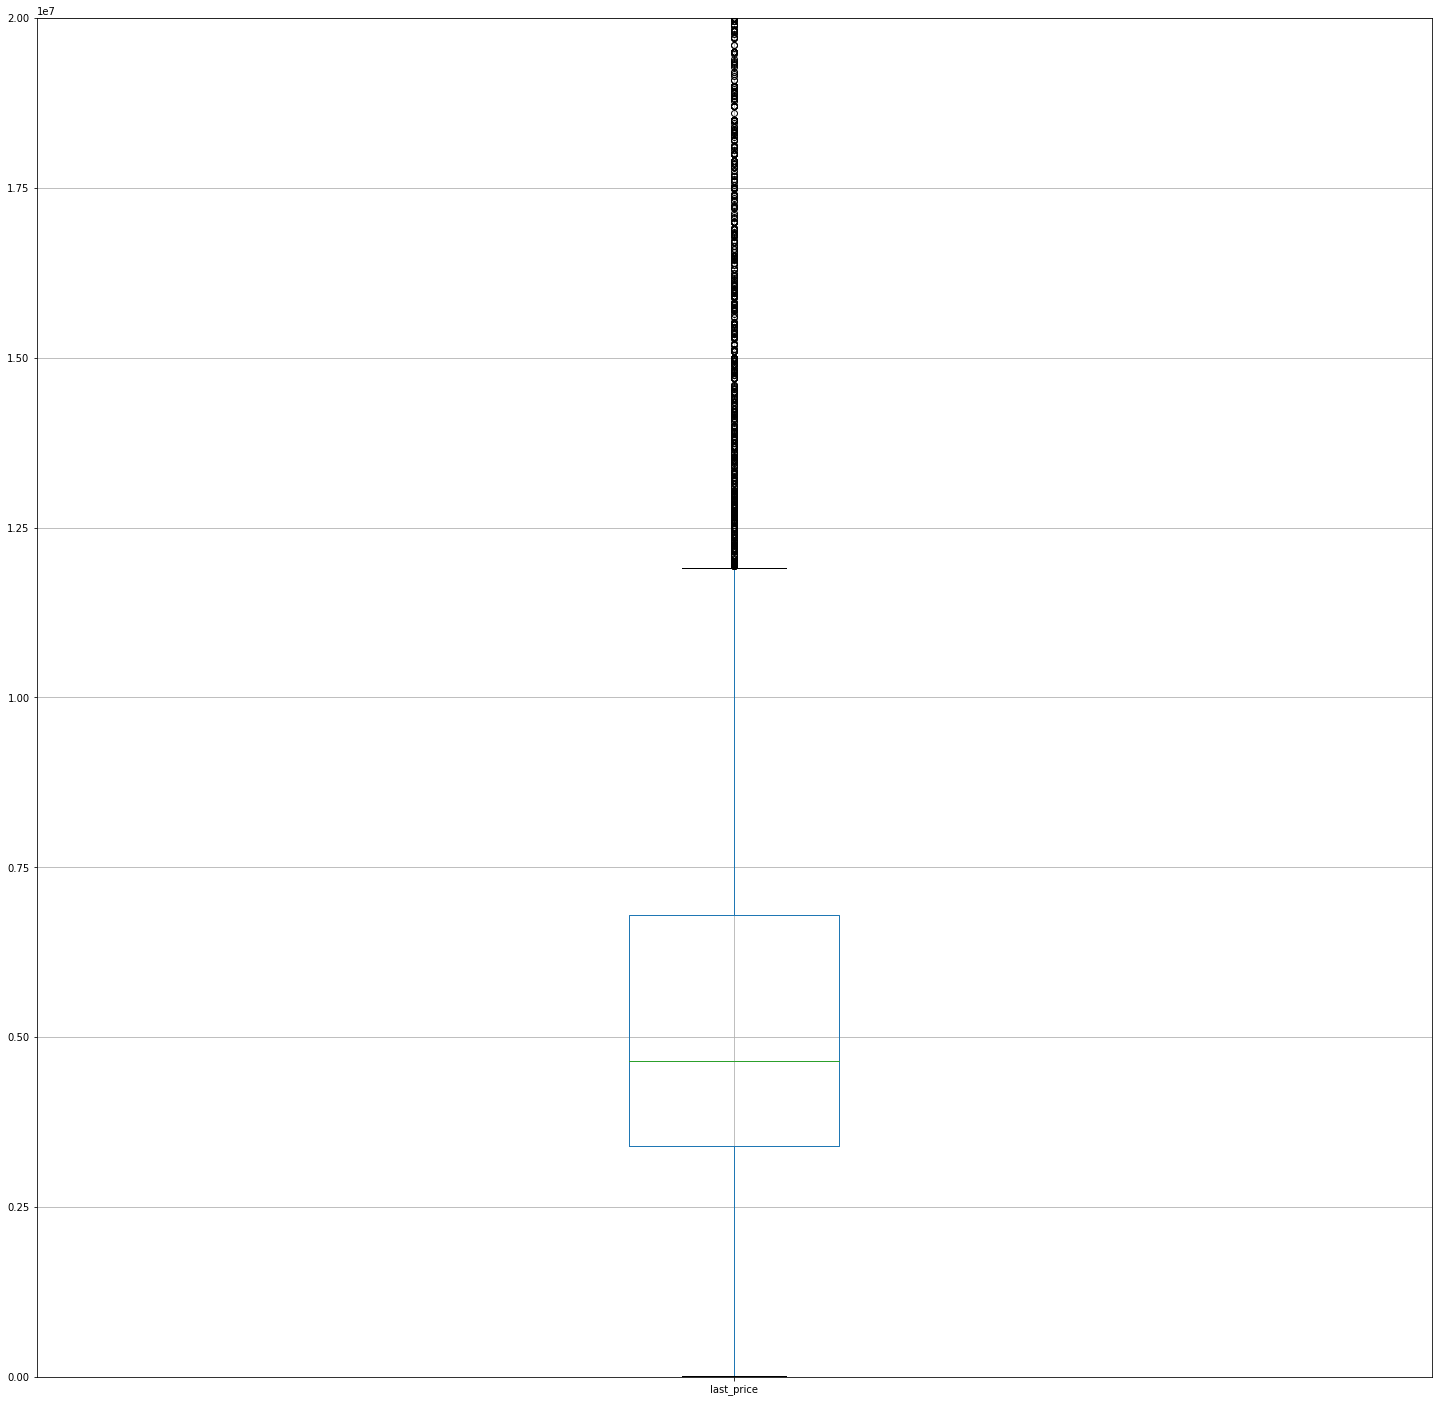

In [38]:
estate.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,20000000); #уменьшим масштаб

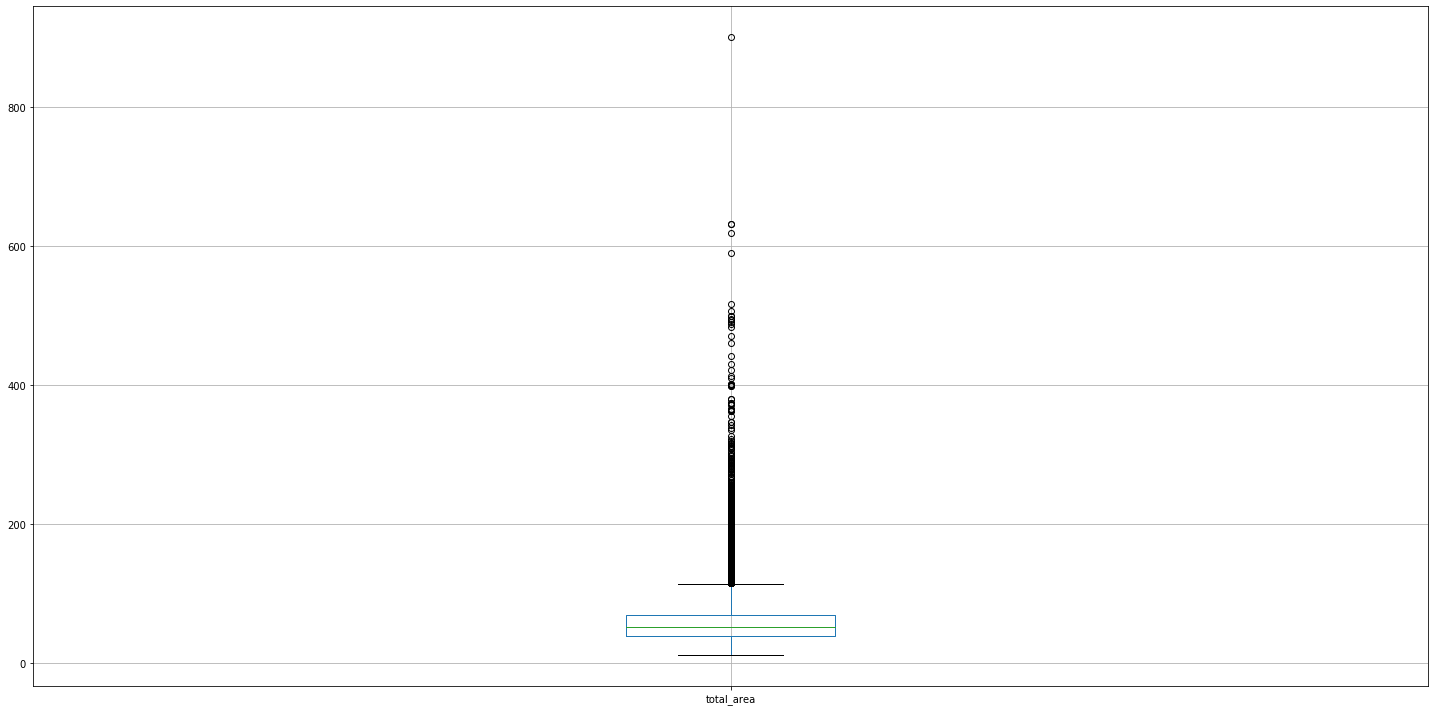

In [86]:
estate.boxplot('total_area', figsize = (25,12.5));


Определим границы по усам boxplot:

**rooms** - от 0 до 6 комнат

**ceiling_heght** - от 2,4 до 3,3 м

**last_price** - 0 - 12 млн руб.

**total_area** - 20 - 12- кв.м.

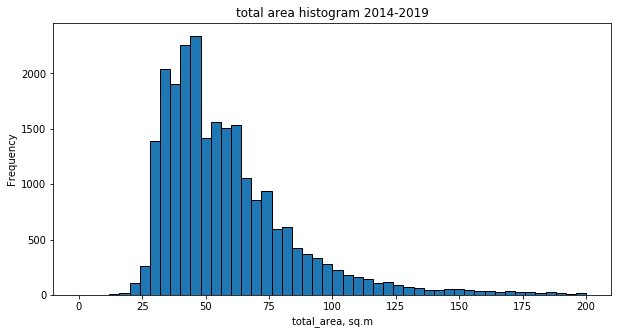

In [40]:
fig, ax = plt.subplots()
estate['total_area'].plot(kind='hist', ec = 'black', bins = 50, range =(0,200), grid = False, figsize = (10,5))
ax.set_title('total area histogram 2014-2019')
ax.set_xlabel('total_area, sq.m');

**Распределение по площади** - наибольшее число квартир от 30 до 75 метров

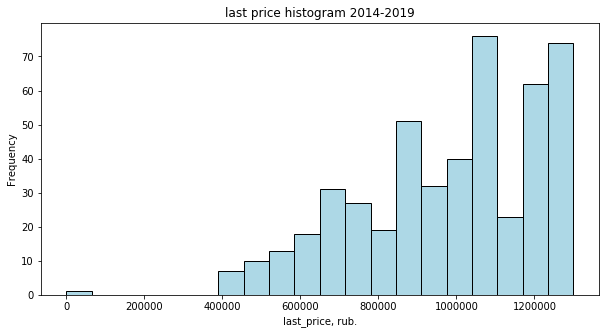

In [41]:
fig, ax = plt.subplots()
ax.set_title('last price histogram 2014-2019')
estate['last_price'].plot(kind = 'hist', ec = 'black', bins = 20, range =(0,1300000), 
                          color = 'lightblue', grid = False, figsize = (10,5))
ax.set_xlabel('last_price, rub.');

**цена квартиры** - от 6 до 12 млн.руб

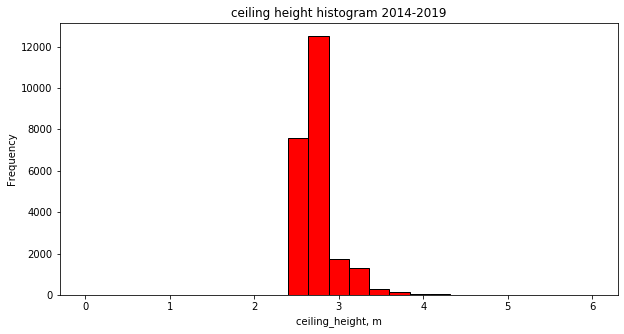

In [42]:
fig, ax = plt.subplots()
ax.set_title('ceiling height histogram 2014-2019')
estate['ceiling_height'].plot(kind='hist', ec = 'black', bins = 25, range =(0,6), color = 'red', grid = False, figsize = (10,5))
ax.set_xlabel('ceiling_height, m');

**Высота потолков** - высота потолков в большинстве квартиа от 2,4 до 2,8 м, остальное - редкость

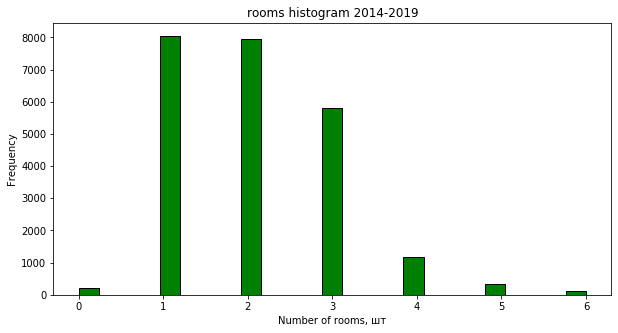

In [43]:
fig, ax = plt.subplots()
estate['rooms'].plot(kind='hist', ec = 'black', bins = 25, range =(0,6), color = 'green', grid = False, figsize = (10,5))
ax.set_title('rooms histogram 2014-2019')
ax.set_xlabel('Number of rooms, шт');

**Количество комнат** от 1 до 3, остальное - редкость

**Изучим время продажи квартир**

In [44]:
print('Медиана по длительности продажи квартир', estate['days_exposition'].median()) #найдем медиану

Медиана по длительности продажи квартир 95.0


In [45]:
estate['days_exposition'].describe().to_frame() #посмотрим остальные данные

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


Среднее время продажи квартиры - 180 дней, медиана 95. 1580 дней - вероятно не закрытые объявления. Среднее и медиана - вполне реальные значения

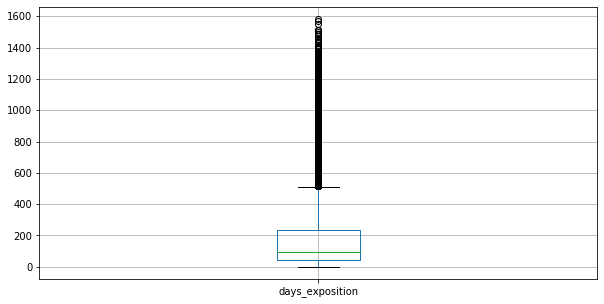

In [87]:
estate.boxplot('days_exposition', figsize=(10,5));

Разумные границы продажи - 500 дней

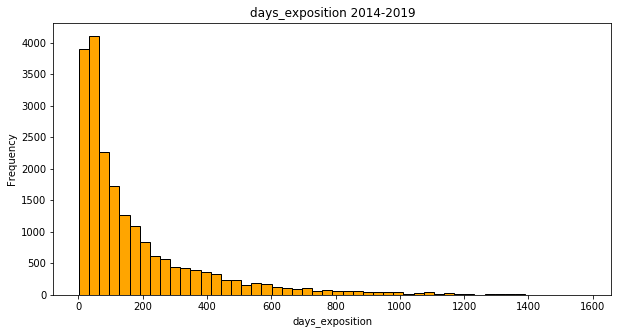

In [47]:
fig, ax = plt.subplots()
estate['days_exposition'].plot(kind='hist', bins=50, figsize=(10,5), ec='black',grid = False, color = 'orange');
ax.set_title('days_exposition 2014-2019')
ax.set_xlabel('days_exposition');

Большинство квартир продается за 50 дней. Чем выше срок продажи, тем реже случаются сделки. Разумно будет сделать срез до 500 дней

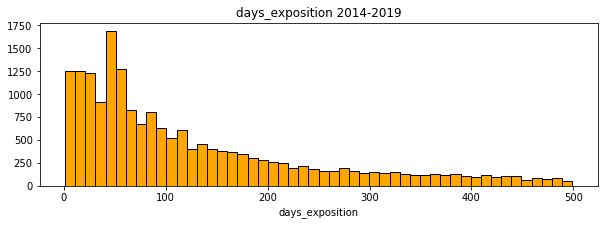

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition 2014-2019')
estate.query('days_exposition<500')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Есть пик продаж в районе 40-60 дней. Выглядит необычно. Рассмотри этот интервал.

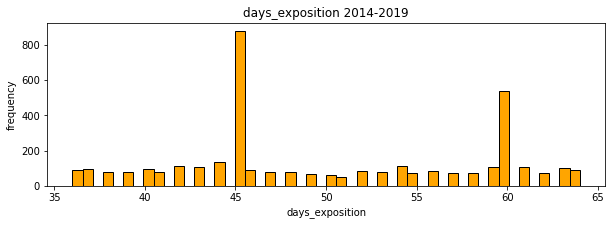

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
estate.query('35<days_exposition<65')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Видные четкие всплески продаж квартир на 45 и 60 день, возможно связано с автоматическим закрытием объявлений на 45 и 60 день и не продлении периода размещения. Посмотрим промежуток 75 и 90 дней.

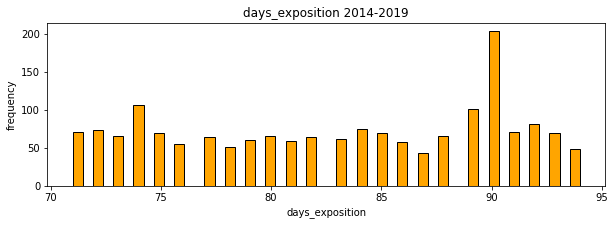

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
estate.query('70<days_exposition<95')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

На 90 дней тоже всплеск, 75 дней эту теорию опровергают. Тогда добавим 15 и 30

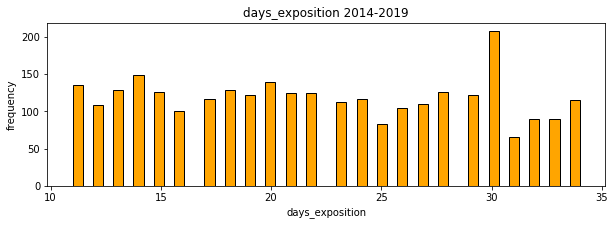

In [51]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
estate.query('10<days_exposition<35')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Похоже автоматическое закрытие происходит раз в месяц + на 45 день (возможно бесплатный пробный период 2 недели + месяц сверху ) Идём дальше.

**зависимость цены от числа комнат, этажа и удалённости от центра**

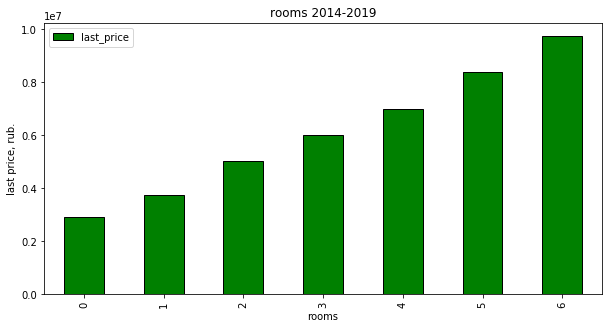

In [52]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('rooms 2014-2019')
estate.query('last_price<12000000 and rooms<=6').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax); #сразу возьмем без выбросов

Чем больше комнат, тем выше цена

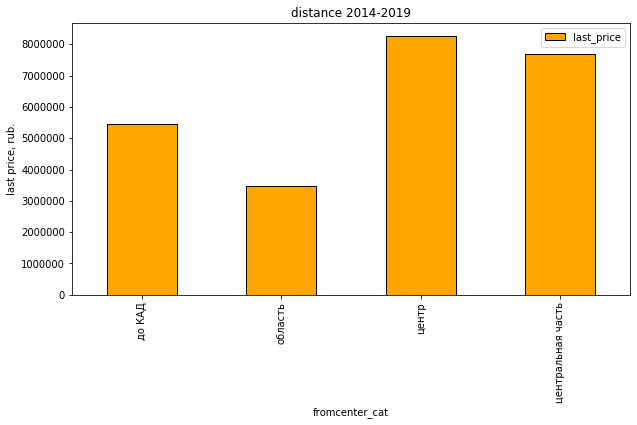

In [53]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('distance 2014-2019')
estate.query('last_price<12000000').pivot_table(index ='fromcenter_cat', values='last_price').plot(kind ='bar',figsize = (10,5)
                                                                          , color = 'orange', ec = 'black', ax=ax);
#сразу возьмем срез по нашему диапазону до 12 млн руб (без выбросов)

Чем ближе к центру, тем выше стоимость

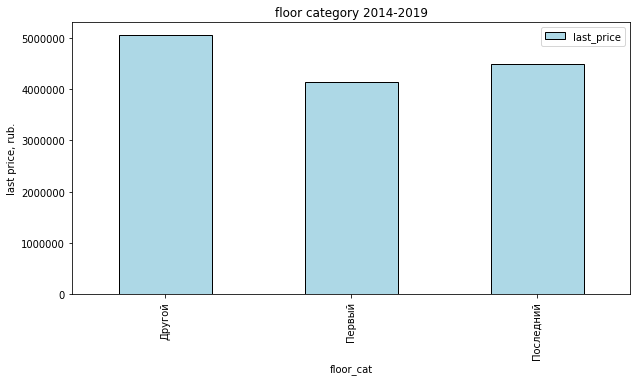

In [54]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('floor category 2014-2019')
estate.query('last_price<12000000').pivot_table(index ='floor_cat', values='last_price').plot(kind ='bar',figsize = (10,5), ax=ax
, color = 'lightblue', ec = 'black'); #без выбросов

Ожидаемо: первый и последний этаж - дешевле

**Зависимость цены от дня недели, месяца года**

Построим график заквисимости медианы **last_price** от периода продажи

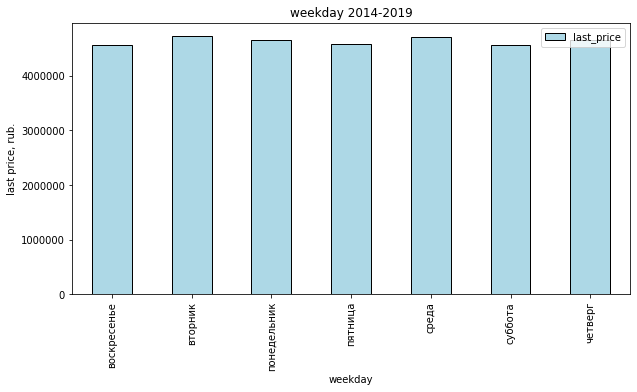

In [55]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('weekday 2014-2019')
estate.pivot_table(index ='weekday', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
, color = 'lightblue', ec = 'black', ax=ax);

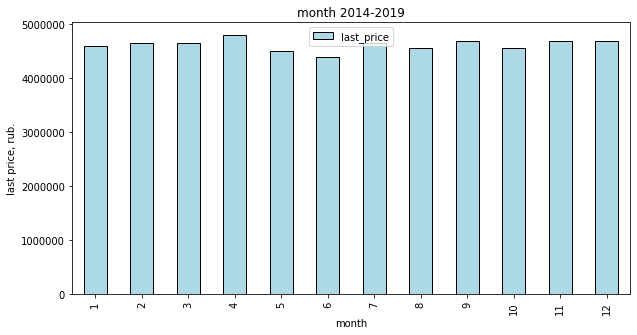

In [56]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
estate.pivot_table(index ='month', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),
ax=ax , color = 'lightblue', ec = 'black');

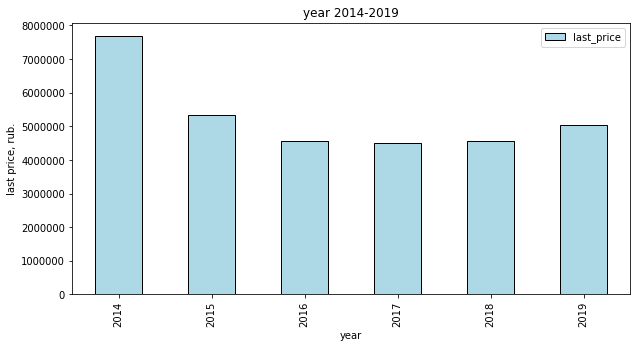

In [57]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('year 2014-2019')
estate.pivot_table(index ='year', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),
ax=ax , color = 'lightblue', ec = 'black');

Увеличим графики для более детального рассмотрения данных

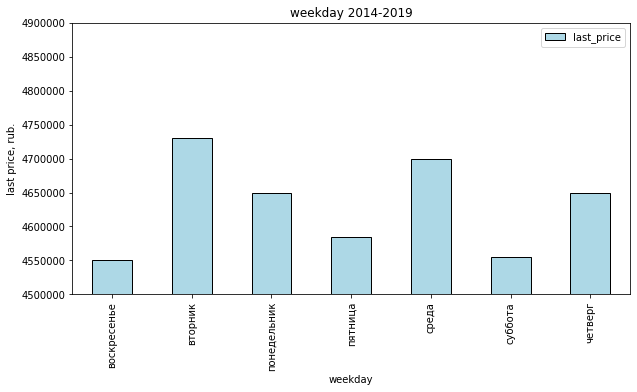

In [58]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('weekday 2014-2019')
estate.pivot_table(index ='weekday', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5), ax=ax
 , color = 'lightblue', ec = 'black', ylim = (4500000, 4900000));

Разницы по дням продажи практически нет. В выходные активность чуть меньше

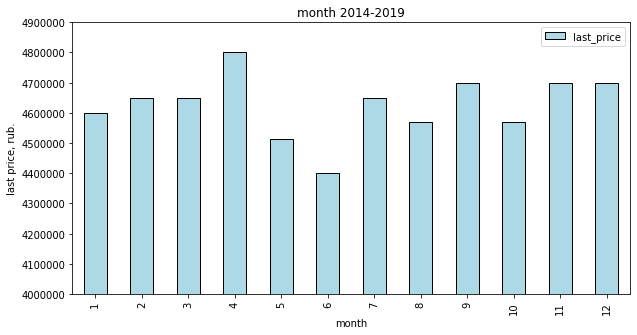

In [59]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
estate.pivot_table(index ='month', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),ax=ax
 , color = 'lightblue', ec = 'black', ylim = (4000000, 4900000));

Пик продаж - апрель, яма - в июне. Ну тут все очевидно: считается что активный деловой период это осень и весна. Летом - период отпусков и многие впросы часто откладывают либо стараются завершить побыстрее (что мы и видим на графике). Аналогично все сделки хотят завершить до нового года (ноябрь и декабрь). Май и январь занижены за счёт длинных праздников.

В общем можно сказать, что месяц не особо влияет на продажи. Факторы, влияющие на продажи (по месяцам) - это некоторая сезонность

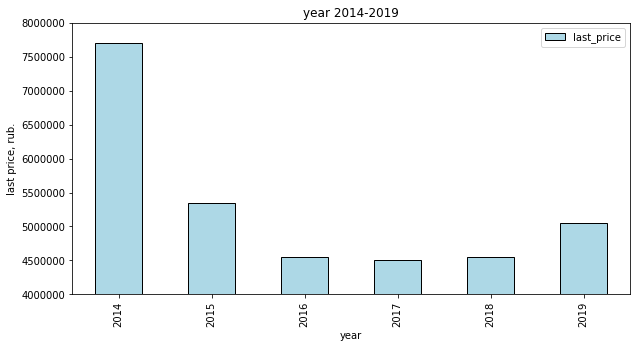

In [60]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('year 2014-2019')
estate.pivot_table(index ='year', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 8000000),ax=ax);

2014 год  выделяется. Надо смотреть подробней. 2014 год начало кризиса в РФ. При первых признаках кризиса люди стараются вложить деньги в недвижимость, валюту, золото и т.д. следовательно идёт всплеск сделок. Затем логично идет спад если кризис затягивается: курс рубля падает, платежеспособность падает -> количество сделок падает. 2019 - относительная стабилизация и рост увеличения сделок.

Смотрим 2014 поподробнее

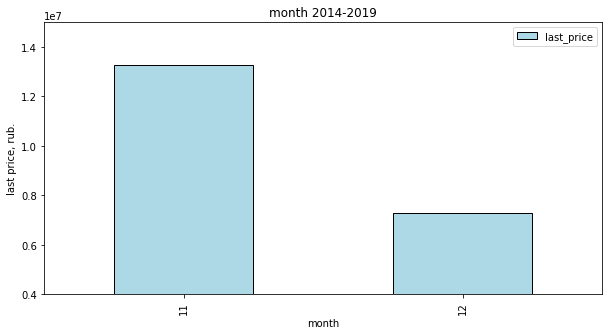

In [61]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
estate.query ('year == 2014').pivot_table(index ='month', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 15000000),ax=ax);

Данные есть только за два последних месяца 2014 года. Как мне кажется, мы видим падение пика инвестиций в неджвижимость, курс евро с октября по ноябрь 2014 вырос практически два раза. И когда он пробил потолок, цены рванули вверх и покупать недвижимость стало позно. Началось плавное падение продаж.

**Рассмотрим 10 городов с наибольшим числом объявлений**

In [62]:
print('Toп 10 городов по продажам', 
      estate['locality_name'].value_counts().head(10).to_frame()) #посмотрим на них

Toп 10 городов по продажам                    locality_name
Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237


соберем датафрейм для просмотра медиан по цене за квадратный метр и стоимости квартиры

In [63]:
top10 = estate['locality_name'].value_counts().index.tolist()[0:10]
mean10_metrics = [estate[estate['locality_name'] == city]['square_meter_price'].median() for city in top10]
mean10_prices = [estate[estate['locality_name'] == city]['last_price'].median() for city in top10]
top10frame = {'city': top10, 'square_meter_price': mean10_metrics, 'last_price': mean10_prices}
dataframe = pd.DataFrame(top10frame).sort_values(by = 'square_meter_price', ascending = False)
print(dataframe)



                city  square_meter_price  last_price
0    Санкт-Петербург            104761.0   5500000.0
4             Пушкин            100000.0   5180000.0
8    деревня Кудрово             91860.0   3790000.0
6  посёлок Парголово             91642.0   4100000.0
1     посёлок Мурино             85890.0   3400000.0
2     посёлок Шушары             76876.0   3950000.0
5            Колпино             74723.5   3600000.0
7            Гатчина             67796.0   3100000.0
3         Всеволожск             65789.0   3450000.0
9             Выборг             58158.0   2897000.0


Ожидаемо, самый большой ценник  в Питере. Затем - исторический и зелёный пригород - г. Пушкин. 3 - 6 место - новостройки в районе КАД. Кудрово и Мурино формально вообще Ленобласть. 7-10 места города за КАДом, ближайший из которых - Колпино. Самый дешевый - Выборг. Находится почти на границе с Финляндией

**Посмотрим на зависимость цены по расположению до центра города**

In [64]:
estate['cityCenters_nearest_km'] = (estate['cityCenters_nearest'] / 1000).round(0)
estate['cityCenters_nearest_km'].to_frame().head() #переведем метры в километры и округлим. Проверим

,cityCenters_nearest_km
0,16.0
1,19.0
2,14.0
3,7.0
4,8.0


Составим график зависимости  удаленности от центра от стоимости. Фильтр возьмем по Петербургу

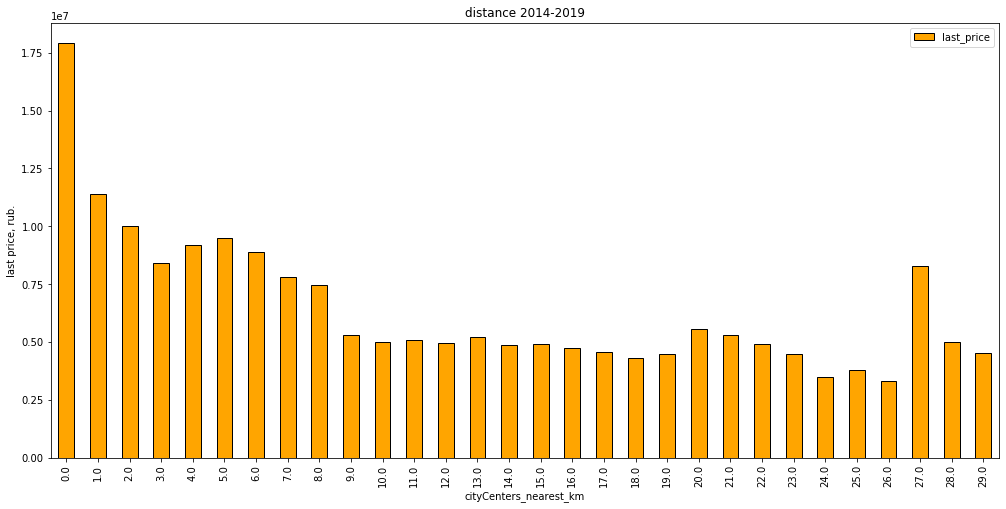

In [65]:
estate_spb = estate.query('locality_name == "Санкт-Петербург"')

fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('distance 2014-2019')
estate_spb.pivot_table(index ='cityCenters_nearest_km', values='last_price', aggfunc = 'median').plot(kind ='bar',
                                figsize = (17,8), xlim = (0,30), color = 'orange', ec = 'black',ax=ax);                                    

По графику можно сказать, что центр - это от 0 до 8 км (ранее мы установили этот параметр = 5). Далее медианная цена на квартиры резко падает. Провал в районе 3-4 км, по моему мнению, связан с большим количеством квартир, переделанных из коммуналок. Площадь там не большая и цена не высока. 4 - 8 км. Виляние не совсем центральных, но престижных для жизни - например Петрогадский район, в состав которого входит элитнейший Крестовский остров со стадионом, яхтклубом, большой парковой зоной и аттракционами.

**Рассмотрим детально центр Петербурга. Как видно из графика выше - это от 0 до 8 км**

Сравниеваем по: 

площадь;


цена;


число комнат;


высота потолков

Повторим наши графики, как и в целом по датафрейму, но уже взяв срез по центру

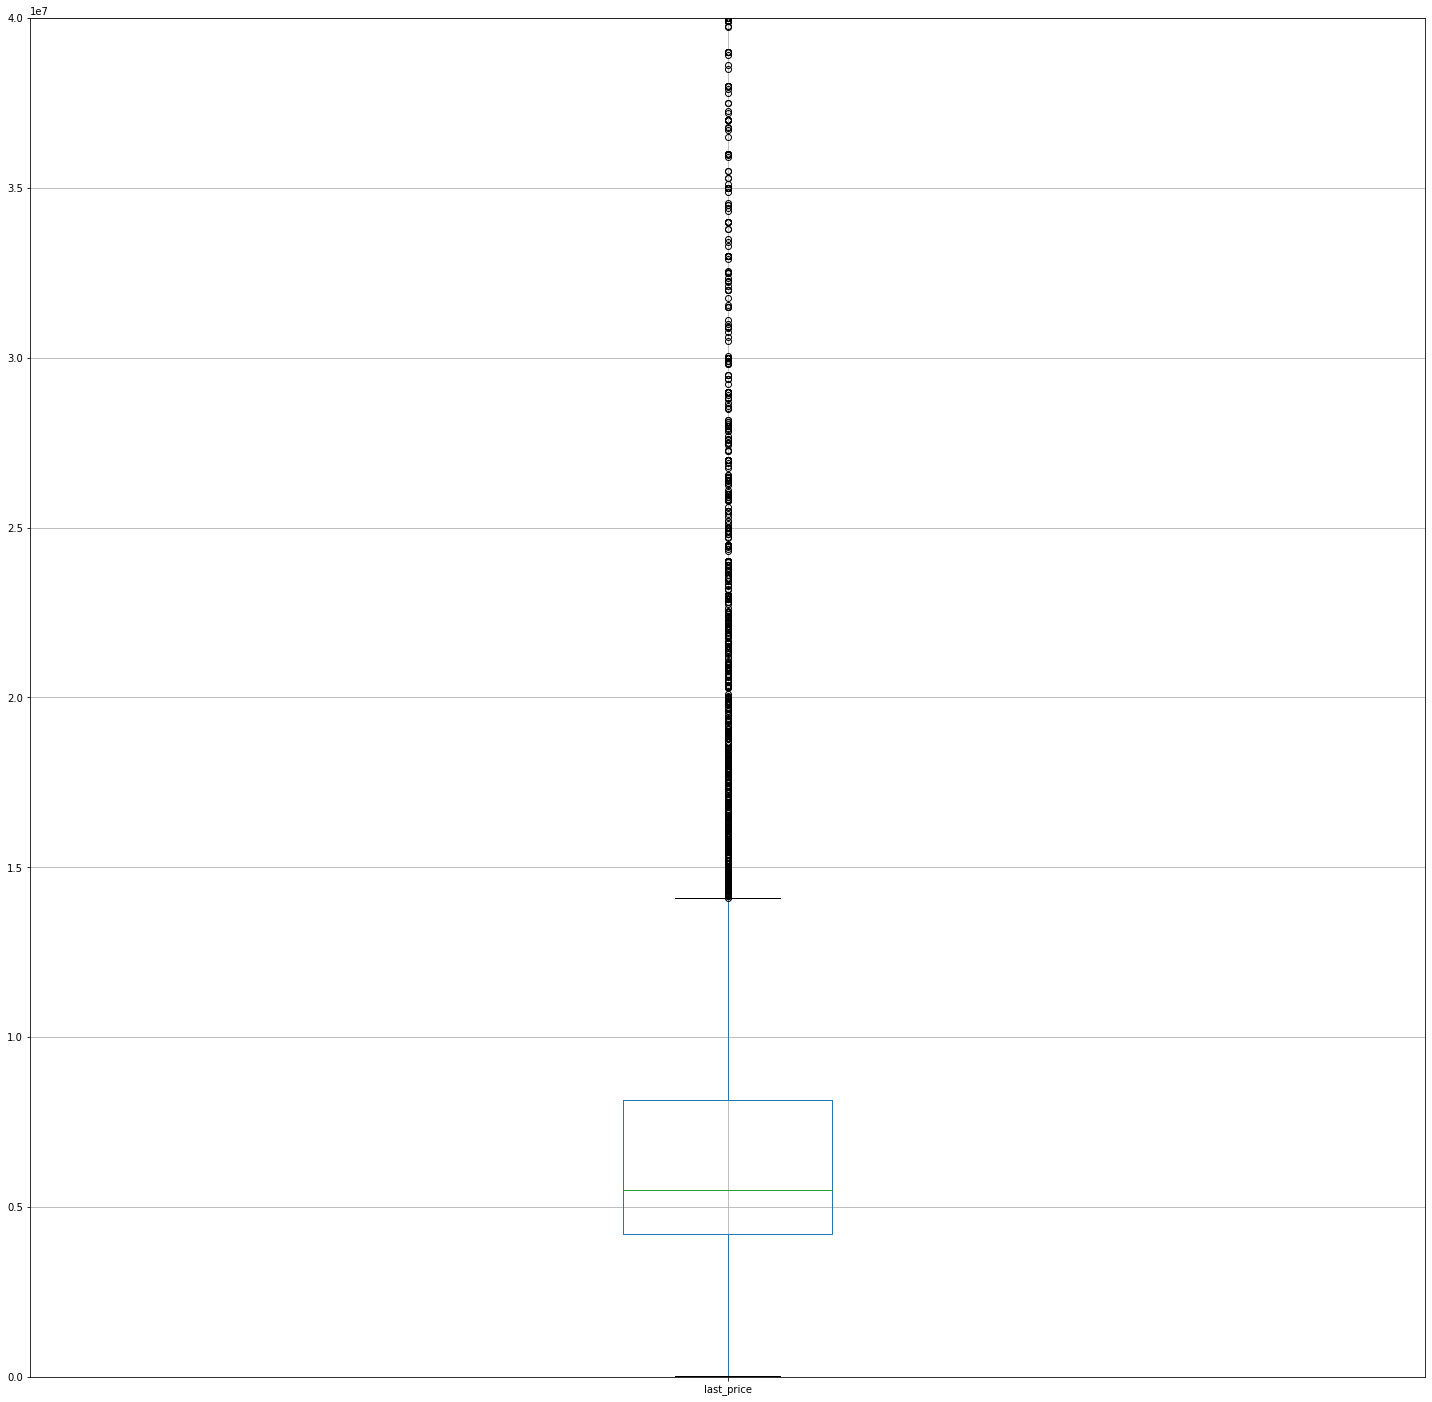

In [88]:
estate_spb.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,40000000); #посмотрим выбросы в СПб

Верхняя граница - 14 млн.руб

In [67]:
estate_spb_center = estate_spb.query('cityCenters_nearest <= 8000')

(0, 40000000)

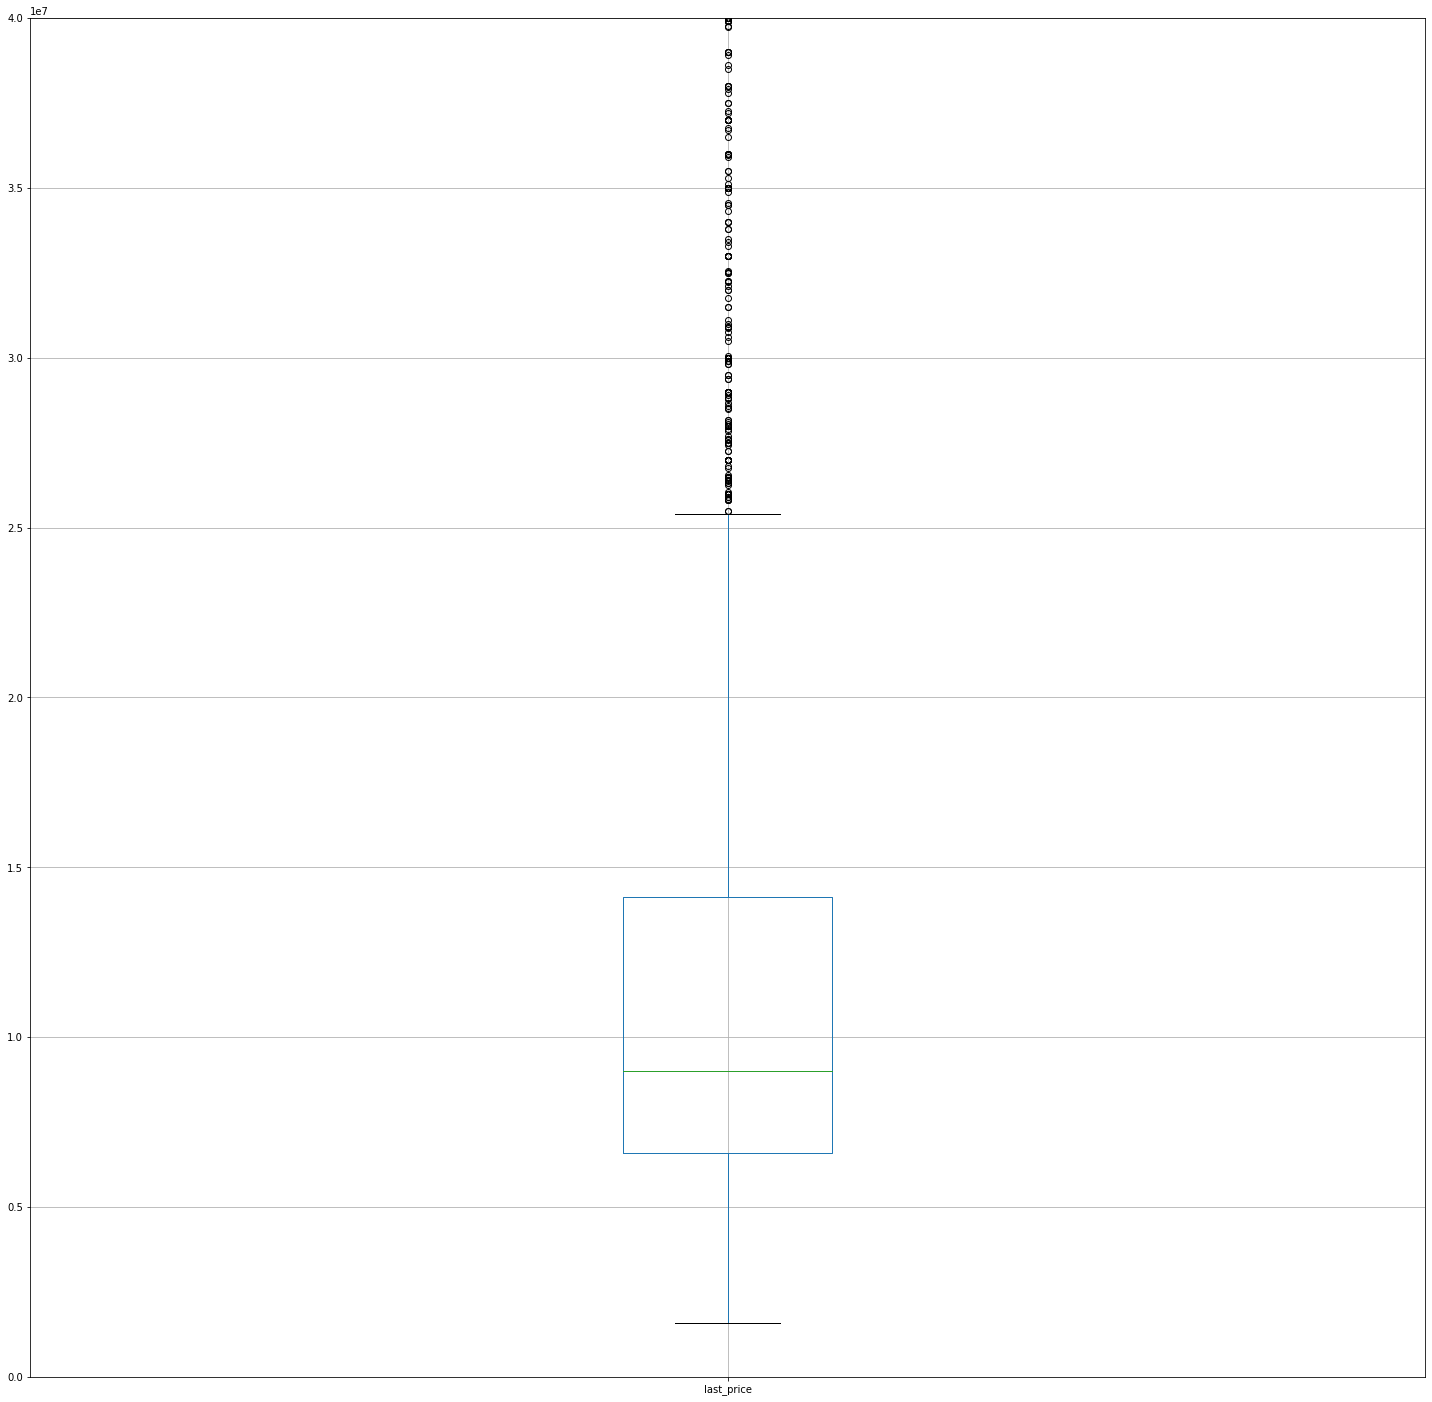

In [68]:
estate_spb_center.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,40000000); #посмотрим выбросы в центре СПб

Верхняя граница = 26млн. рублей. Используем ее в дальнейших расчетах

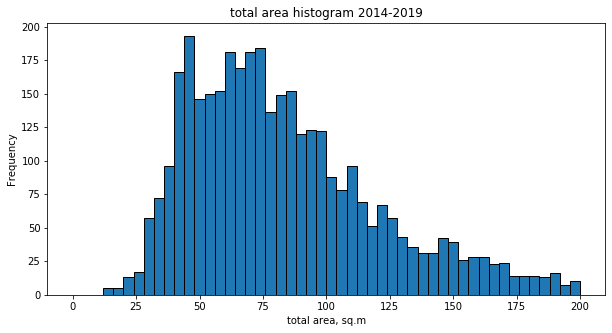

In [69]:
fig, ax = plt.subplots()
ax.set_xlabel('total area, sq.m')
ax.set_title('total area histogram 2014-2019')
estate_spb_center['total_area'].plot(kind='hist', ec = 'black', bins = 50, range =(0,200), grid = False, figsize = (10,5));

Большинство квартир в центре Питера имеют площадь от 40 до 100 квадратных метра

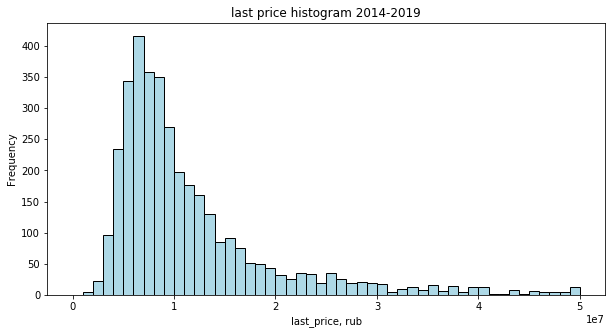

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel('last_price, rub')
ax.set_title('last price histogram 2014-2019')
estate_spb_center['last_price'].plot(kind='hist', ec = 'black', bins = 50, color = 'lightblue', grid = False, figsize = (10,5),range =(0,50000000));

Цена самых популярных квартир - от 8 до 10 млн. руб

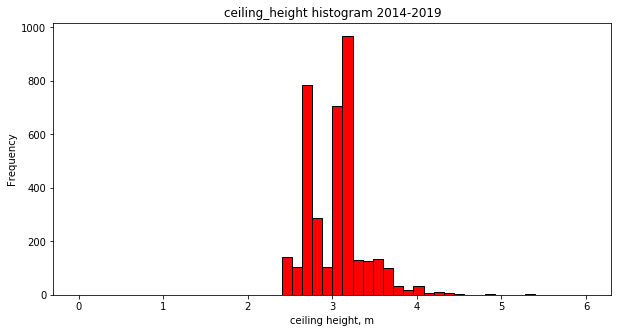

In [71]:
fig, ax = plt.subplots()
ax.set_xlabel('ceiling height, m')
ax.set_title('ceiling_height histogram 2014-2019')
estate_spb_center['ceiling_height'].plot(kind='hist', ec = 'black', bins = 50, range =(0,6), color = 'red', grid = False, figsize = (10,5),ax=ax);

Потолки в основном от 3,2 метра. Ближе к центру - выше потолки

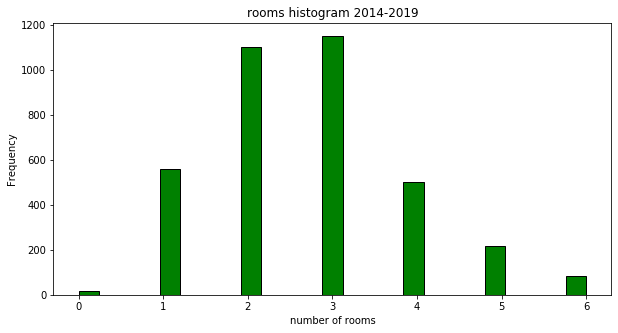

In [72]:
fig, ax = plt.subplots()
ax.set_xlabel('number of rooms')
ax.set_title('rooms histogram 2014-2019')
estate_spb_center['rooms'].plot(kind='hist', ec = 'black', bins = 25, range =(0, 6), color = 'green', grid = False, figsize = (10,5),ax=ax);

В основном в центре 2-3х комнатные квартиры

**зависимость цены от числа комнат, этажа и удалённости от центра**

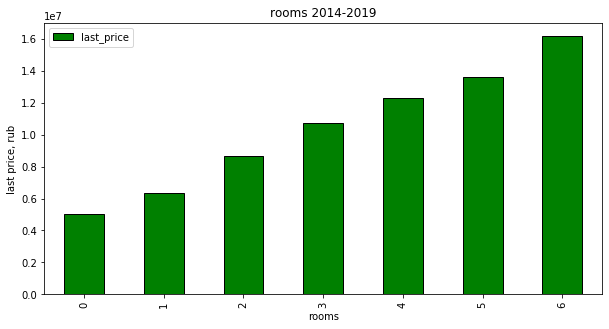

In [73]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub');
ax.set_title('rooms 2014-2019')
estate_spb_center.query('rooms<=6 and last_price <26000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax); #сразу откинем выбросы

Больше комнат - больше цена

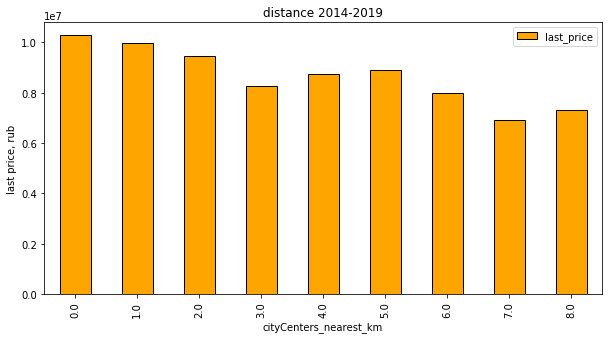

In [74]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('distance 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='cityCenters_nearest_km', values='last_price', aggfunc = 'median').plot(kind ='bar',figsize = (10,5), xlim = (0,10), color = 'orange', ec = 'black',ax=ax);

Дальше от центра - дешевле, все логично

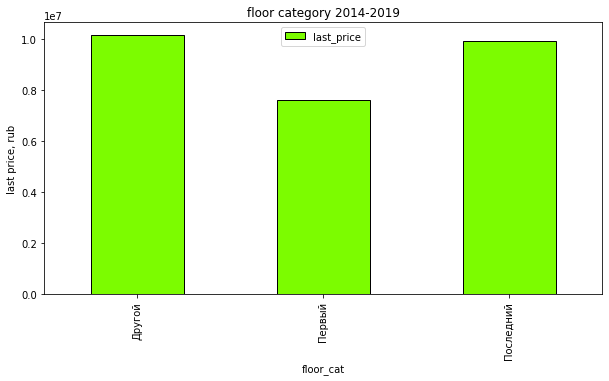

In [75]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('floor category 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='floor_cat', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'lawngreen', ec = 'black',ax=ax);

Мансарда в центре Петербурга это мечта. Вид на крыши Петербурга стоит дорого. Тут мы видим различие от общего датафрейма. Последний этаж практически равен другому

**Зависимость цены в центре Питера от дня недели, месяца года**

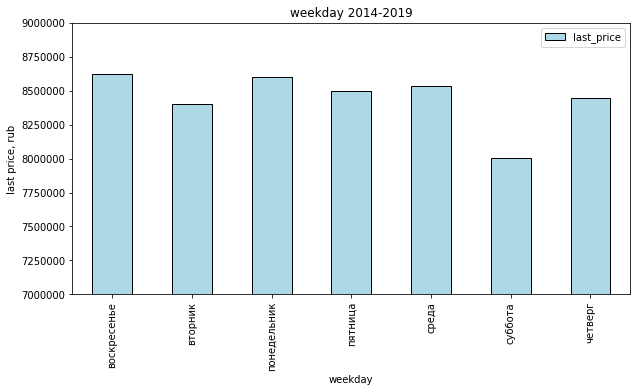

In [76]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('weekday 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='weekday', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (7000000, 9000000),ax=ax);

День недели практически не влияет на медианноую стоимость кваритр

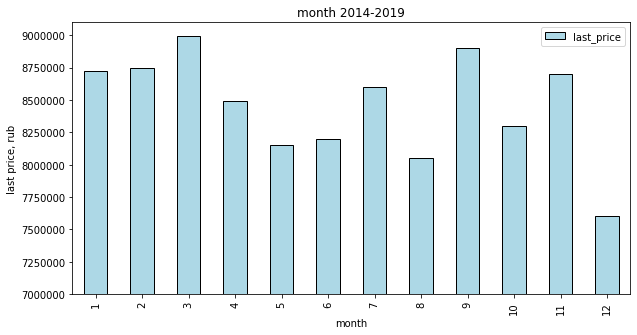

In [77]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('month 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='month', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (7000000, 9100000),ax=ax);

Картина отличается от общего датафрейма, там самый дорогой месяц был в апреле. В центре Питера - март. Летний месяцы - квартира дешевле

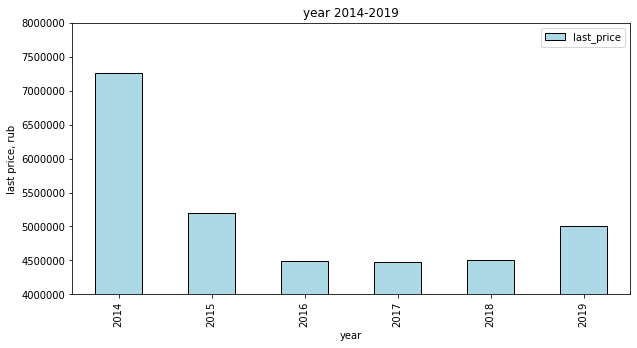

In [78]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('year 2014-2019')
estate.query('last_price < 26000000').pivot_table(index ='year', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 8000000),ax=ax);

Аналогично общему датафрейму - самая большая медианная стоимость в 2014. Рассмотрим поподробнее

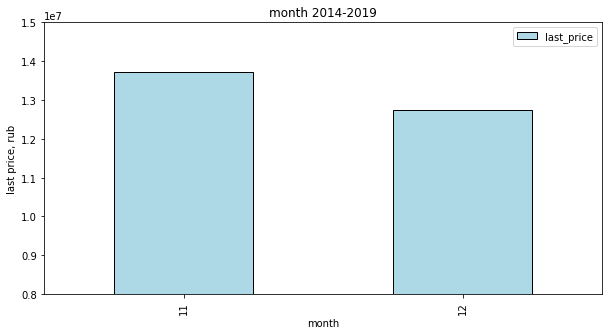

In [79]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('month 2014-2019')
estate_spb_center.query('year == 2014 and  last_price < 26000000').pivot_table(index ='month', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (8000000, 15000000),ax=ax);

В отличии от общего датафрейма, спад более плавный

**Будет правильным вывести графики для всего датафрейма, Питера и центра Питера в сравнении. Вдруг что-то упустили или не заметили**

Cрезы берём в соответствии с boxplot() для каждого района

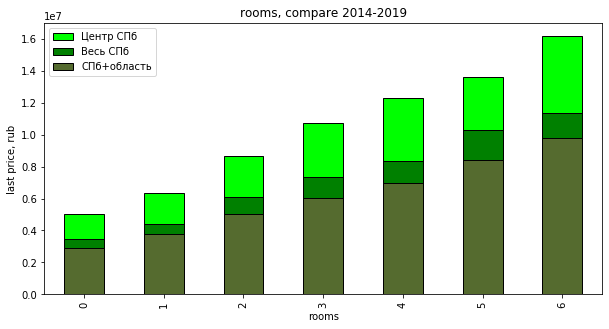

In [80]:
ax = plt.gca()

ax.set_title('rooms, compare 2014-2019')
ax.set_ylabel('last price, rub')

estate_spb_center.query('rooms<=6 and last_price < 26000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'lime', ec = 'black', ax=ax)

estate_spb.query('rooms<=6 and last_price < 14000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax)

estate.query('rooms<=6 and last_price < 12000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'darkolivegreen', ec = 'black', ax=ax)

plt.legend(['Центр СПб', 'Весь СПб', 'СПб+область']);

Чем больше комнат, тем больше цена. Независимо от геолокации.

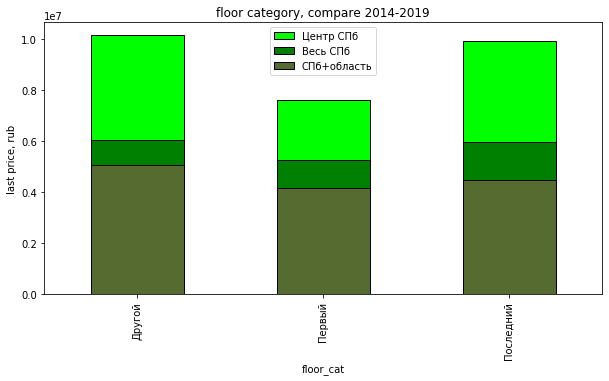

In [81]:
ax = plt.gca()

ax.set_ylabel('last price, rub')
ax.set_title('floor category, compare 2014-2019')

estate_spb_center.query('last_price < 26000000').pivot_table(index ='floor_cat', values='last_price').plot(kind ='bar',
                                                            figsize = (10,5) , color = 'lime', ec = 'black', ax=ax)
estate_spb.query('last_price < 14000000').pivot_table(index ='floor_cat', values='last_price').plot(kind ='bar',
                                                    figsize = (10,5) , color = 'green', ec = 'black', ax=ax)
estate.query('last_price < 12000000').pivot_table(index ='floor_cat', values='last_price').plot(kind ='bar',
                                                        figsize = (10,5) , color = 'darkolivegreen', ec = 'black', ax=ax)

plt.legend(['Центр СПб', 'Весь СПб', 'СПб+область']);

На первом этаже квартиры везде дешевле

Сравнение по времени по годам / месяцам / дням недели строить не вижу смысла, т.к. стоимость квартиры не слишком зависит от даты публикации. Есть некоторая сезонность. Но она незначительна. Это видно и так на графиках выше.

Добавим совместную гистограмму по времени продаж для наших трех районов. Границы возьмем по .boxplot() для days_exposition

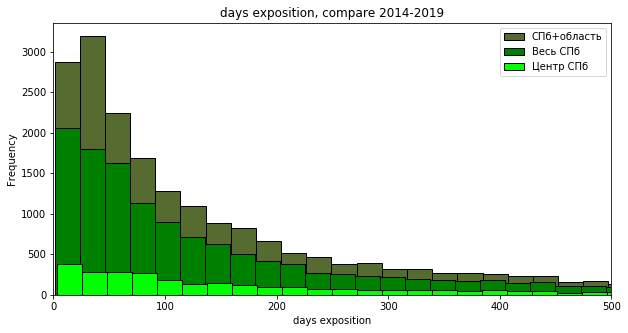

In [82]:
ax = plt.gca()

ax.set_xlabel('days exposition')
ax.set_title('days exposition, compare 2014-2019')

estate['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='darkolivegreen', xlim = (0,500))
estate_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='green', xlim = (0,500))
estate_spb_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='lime', xlim = (0,500))

plt.legend(['СПб+область', 'Весь СПб', 'Центр СПб']);

Видны некоторые различия по районам. Центр и Спб продаются за первые 25 дней, область же похоже влияет на весь регион. Там период продаж 25-50 дней. Сложно сказать с чем это связано. Кудрово и Девяткино(Мурино) формально облаcть, города с пешей доступностью метро. Выбор там велик. Вариантов много - возможно этот фактор и затягивает срок продажи

**Посмотрим, как влияют остальные параметры квартиры на её окончательную цену, используем .corr() для формирования общей таблицы**

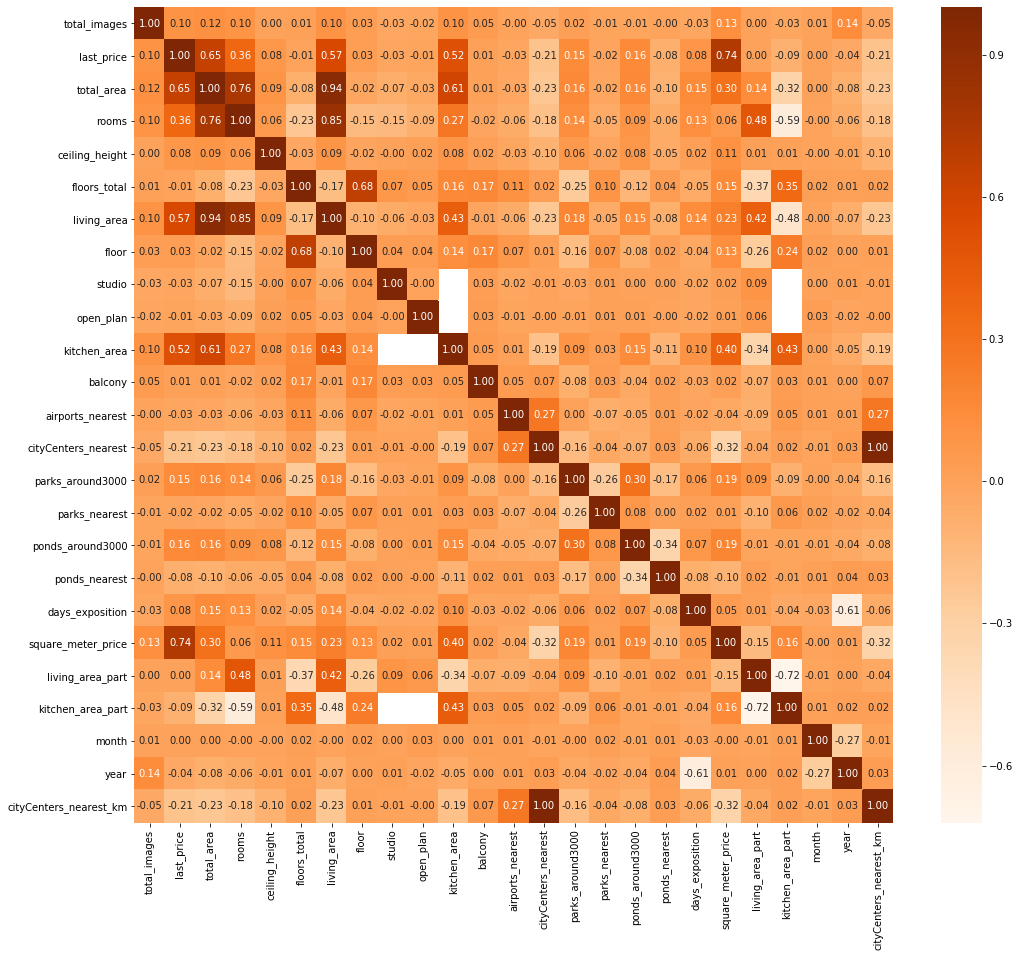

In [83]:
plt.figure(figsize=(17,15))
sns.heatmap(estate.corr(), annot=True, cmap="Oranges", fmt='.2f')

Выделем столбец 'last_price'

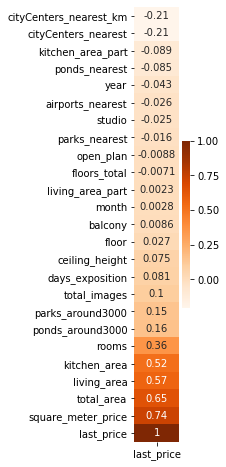

In [89]:
plt.figure(figsize=(1,8))
sns.heatmap(estate.corr()[['last_price']].sort_values(by='last_price', ascending=True), cmap="Oranges", annot = True);

Сильнее всего стоимость квартиры зависит от площади, цены за кв.метр, площади жилой и площади кухни, а так же от количества комнат

### Шаг 5. Общий вывод

Цена квартиры больше всего зависит от следущих вещей:

**Площадь квартиры** - Фактор больше всего влияющий на окончательную стоимость. Чем больше площадт квартиры, тем выше цена. Независимо от локации.

**Цена за квадратный метр** - Аналогично площади квартиры. Чем выше стоимость квадратного метра (а она зависит от стоимости земли, на которой стоим жилье) тем дороже квартира

**Жилая площадь и площадь кухни** - Чем выше доля жилой площади/площадь кухни, тем выше цена

**Число комнат** - Число комнат прямо влияет на стоимость жилья. Чем больше комнат, тем дороже

**Этаж квартиры** - Ожидаемо: первый этаж дешевле всего. В центре СПб стоимость последнего этажа фактически равна другим. Вид на крыши Петербурга стоит дорого. В остальных случаях последний этаж чуть дешевле других этажей

**Удаленность от центра** - Мы видим зависимость без сюрпризов, Чем ближе к центру - там дороже. Причем в радиусе 1-2 км от центра квартиры на порядок дороже. Выделяется медианная стоимость в районе 8 км от центра. Очевидно, на нее влияет элитный Крестовский остров в составе Петроградского района.

**Дата публикации** - В связи с кризисом и обвалом рубля в 2014 году наблюдаются спад продаж. Спрос на квартиры начинает постепенно возвращаться в 2019 году

**время продажи** - большинство квартир продаются в срок от 0 до 50 дней. В области есть перекос на период 25-50 дней. В городе же он равен 0-25 дней. Так же следует отметить что этот параметр не совсем точен. Большинство объявлений закрываются автоматически с периодом, равным 30 дней.

Квартирный вопрос в нашей стране один из самых сложных. Люди обращают внимание только на площадь, цену за квадратный метр и число комнат. В меньшей степени на этаж. Расстояние до центра (фактически, транспортная доступность) тоже немаловажный факт. Остальные же категории, такие как: расстояние до аэропорта или парка - дело второстепенное, скорее воспринимается как приятный бонус.



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод